# Import labraries

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
diabetes_df=pd.read_csv('diabetes.csv')
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [6]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Check the data types of each column
print(diabetes_df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [5]:
# Check the class distribution
print(diabetes_df['Outcome'].value_counts())


0    500
1    268
Name: Outcome, dtype: int64


In [11]:
# Identify duplicate rows
duplicate_rows = diabetes_df.duplicated()
# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
9print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


In [478]:
!pip install sweetviz
dd=pd.read_csv('diabetes.csv')
import sweetviz as sd
d=sd.analyze(dd)
print(d.show_html())

     ----                                     1.6/15.1 MB 16.6 kB/s eta 0:13:33


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\HP\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\HP\anaconda3\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\HP\anaconda3\lib\ssl.py", line 1100, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read op

ModuleNotFoundError: No module named 'sweetviz'

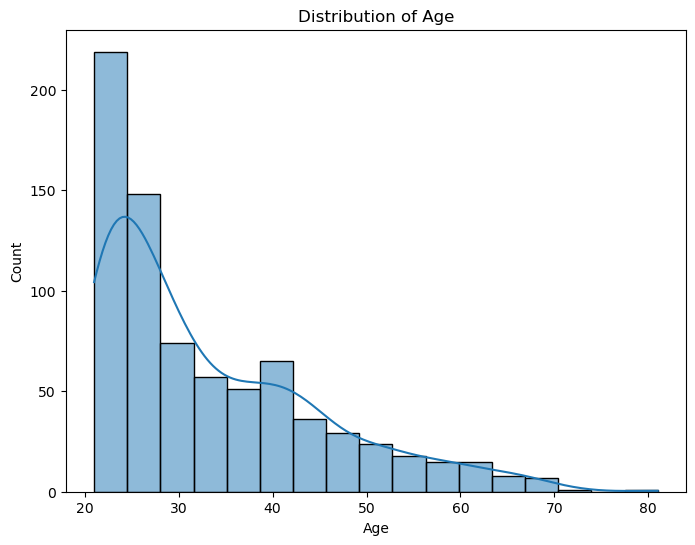

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

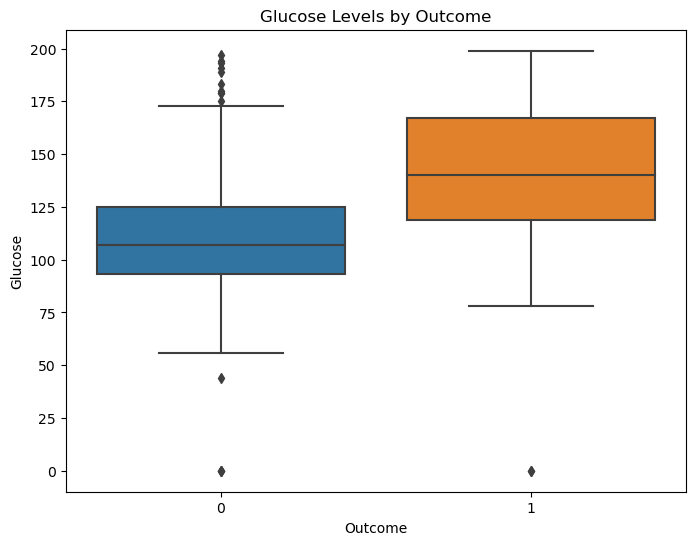

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)
plt.title('Glucose Levels by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


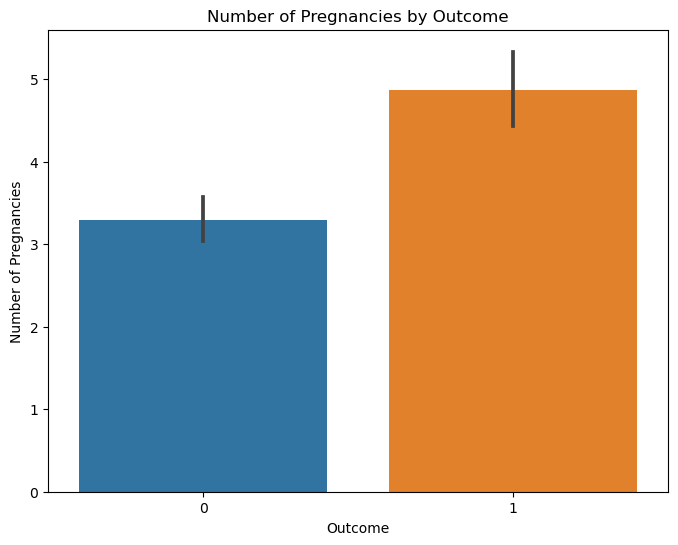

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Pregnancies', data=diabetes_df)
plt.title('Number of Pregnancies by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Number of Pregnancies')
plt.show()

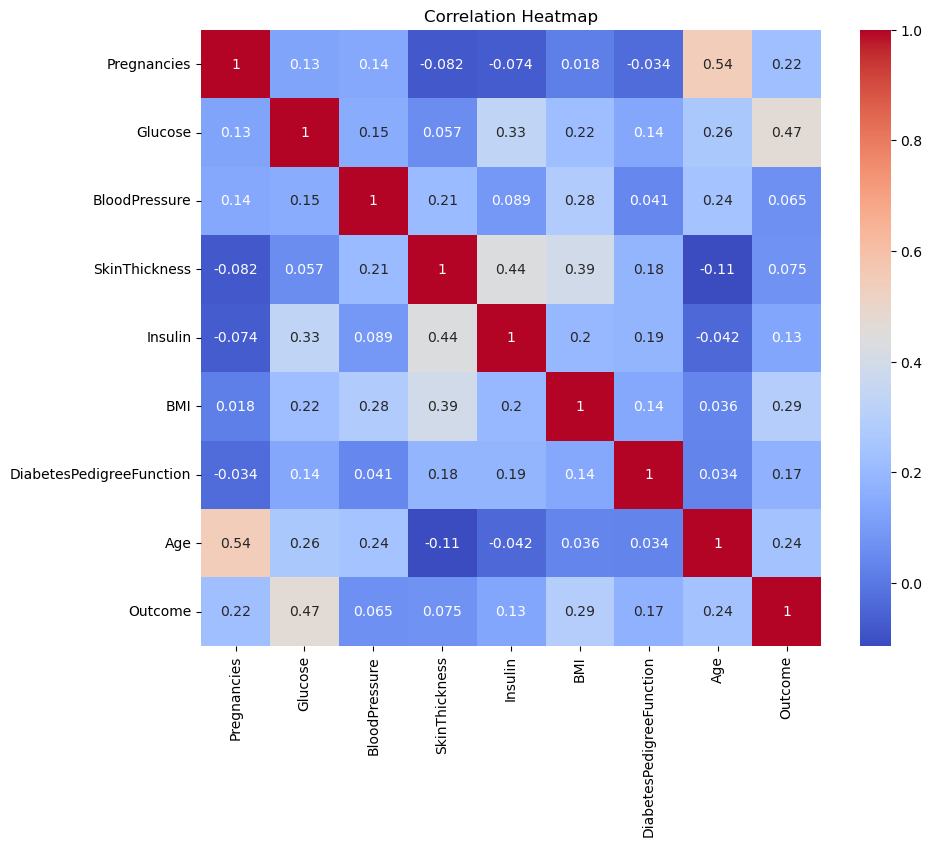

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Use logistic regression With Standardscalar

In [358]:
# Split the dataset into features (X) and target variable (y)
X = diabetes_df.drop('Outcome', axis=1) #seprate independent or dependent features
y = diabetes_df['Outcome']


In [359]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)


In [360]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [361]:
# Apply the machine learning algorithm (Logistic Regression)
model = LogisticRegression(max_iter=100)
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [362]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [364]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 79.65367965367966


# Descision Tree Algorithm With StandardScalar

In [125]:
# Split the dataset into features (X) and target variable (y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']


In [201]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [202]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [203]:
# Apply the machine learning algorithm (Decision Tree Classifier)
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [204]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [205]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_str)



Accuracy: 0.7337662337662337

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



# Using GridSearchCv and StandardScalar with Regression Algorithm 

In [366]:
# Split the dataset into features (X) and target variable (y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']


In [367]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)


In [368]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [369]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

In [370]:
# Perform grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=100), param_grid)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'saga']})

In [371]:
# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'C': 0.1, 'solver': 'saga'}


In [372]:
# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


In [374]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in percentage :", accuracy*100)


Accuracy in percentage : 80.51948051948052


# Using RobustScalar and GridSearchCV with DecisionTree Classifier

In [267]:
# Split the dataset into features (X) and target variable (y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [339]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [340]:
# Scale the features using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [341]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [342]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [343]:
# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [344]:
# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [345]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7878787878787878


# KNN Neighbour Algorithm

In [399]:
# Split the dataset into features (X) and target variable (y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [455]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=35)


In [456]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [457]:
# Apply the KNN algorithm
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [458]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [459]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7922077922077922


# SVM Algorithm used 

In [473]:
# Split the dataset into features (X) and target variable (y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply the SVM algorithm
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7337662337662337


# # Naive Bayes algorithm

In [468]:
from sklearn.naive_bayes import GaussianNB
# Split the dataset into features (X) and target variable (y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the Naive Bayes algorithm
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7662337662337663
